<a href="https://colab.research.google.com/github/a-apte/DS_Visualization_Project/blob/master/Crypto_Price_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SCRAPER

In [1]:
!pip install --upgrade lxml
!pip install --upgrade html5lib
!pip install --upgrade BeautifulSoup4

Requirement already up-to-date: lxml in /usr/local/lib/python3.6/dist-packages (4.2.5)
Requirement already up-to-date: html5lib in /usr/local/lib/python3.6/dist-packages (1.0.1)
Requirement already up-to-date: BeautifulSoup4 in /usr/local/lib/python3.6/dist-packages (4.6.3)


**RESTART RUNTIME AFTER THIS STEP**

In [0]:
# Alt to restarting Runtime

import os
os.kill(os.getpid(), 9)

#### SCRAPER FUNCTION

In [0]:
import datetime as dt
import pandas as pd

# Top 5 cryptocurrencies by market cap: 'bitcoin', 'ripple', 'ethereum', 'stellar', 'tether'


def Crypto_Scraper(crypto = 'bitcoin'):
  
  '''This function will scrape price data for a specific cryptocurrency from CoinMarketCap.com and format it in a desired way for further investigation'''
  
  my_date = dt.date.today()
  year, month, day = str(my_date).split('-')
  url = 'https://coinmarketcap.com/currencies/' + crypto + '/historical-data/?start=20000101&end=' + year + month + day
  df = pd.read_html(url,header=0) 
  df = df[0]
  df.rename(columns = {'Open*': 'Open', 'Close**': 'Close', 'Market Cap': 'Market_Cap'}, inplace = True)
  df.Date = pd.to_datetime(df.Date)
  df['Open'] = df['Open'].astype(float)
  df['High'] = df['High'].astype(float)
  df['Low'] = df['Low'].astype(float)
  df['Close'] = df['Close'].astype(float)  
  df['Volume'].replace('-',0, inplace = True)
  df['Volume'] = df['Volume'].astype(int)
  df['Market_Cap'] = df['Market_Cap'].astype(float)
  df['DayOfWeek'] = df['Date'].dt.weekday_name # Further use of Date before setting the Index
  df['Year'] = df['Date'].dt.year # Further use of Date before setting the Index
  df['Month'] = df['Date'].dt.month # Further use of Date before setting the Index
  df['Day'] = df['Date'].dt.day # Further use of Date before setting the Index
  df.set_index('Date', inplace = True)
  df = df.sort_index(ascending=True)
  
  return df
  
  

#### BITCOIN

In [2]:
dfB = Crypto_Scraper() # default is bitcoin

dfB.head()

,Open,High,Low,Close,Volume,Market_Cap,DayOfWeek,Year,Month,Day
Date,,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,0,1.488567e+09,Sunday,2013,4,28
2013-04-29,134.44,147.49,134.00,144.54,0,1.603769e+09,Monday,2013,4,29
2013-04-30,144.00,146.93,134.05,139.00,0,1.542813e+09,Tuesday,2013,4,30
2013-05-01,139.00,139.89,107.72,116.99,0,1.298955e+09,Wednesday,2013,5,1
2013-05-02,116.38,125.60,92.28,105.21,0,1.168517e+09,Thursday,2013,5,2


In [3]:
dfB.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
Market_Cap    float64
DayOfWeek      object
Year            int64
Month           int64
Day             int64
dtype: object

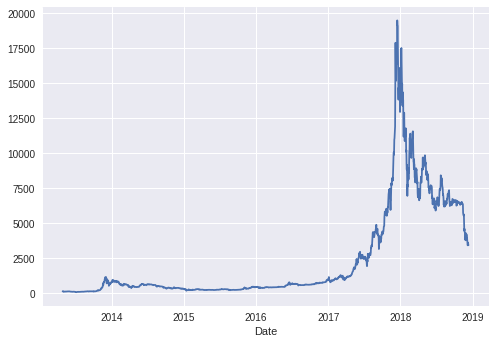

In [4]:
dfB['Close'].plot.line()

#### RIPPLE

In [5]:
dfR = Crypto_Scraper('ripple')

dfR.head()

,Open,High,Low,Close,Volume,Market_Cap,DayOfWeek,Year,Month,Day
Date,,,,,,,,,,
2013-08-04,0.005874,0.005927,0.005874,0.005882,0,45983577.0,Sunday,2013,8,4
2013-08-05,0.005875,0.005980,0.005613,0.005613,0,43879157.0,Monday,2013,8,5
2013-08-06,0.005637,0.005661,0.004629,0.004680,0,36591008.0,Tuesday,2013,8,6
2013-08-07,0.004669,0.004682,0.004333,0.004417,0,34534121.0,Wednesday,2013,8,7
2013-08-08,0.004397,0.004424,0.004175,0.004254,0,33258632.0,Thursday,2013,8,8


In [6]:
dfR.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
Market_Cap    float64
DayOfWeek      object
Year            int64
Month           int64
Day             int64
dtype: object

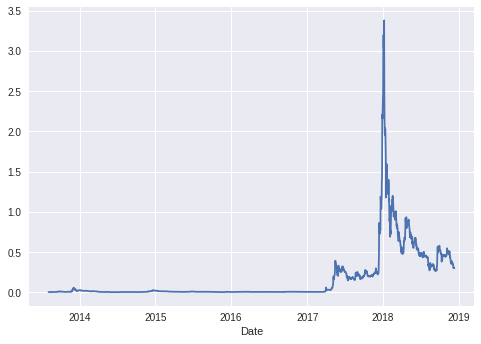

In [7]:
dfR.Close.plot.line()

#### ETHEREUM

In [8]:
dfE = Crypto_Scraper('ethereum')

dfE.head()

,Open,High,Low,Close,Volume,Market_Cap,DayOfWeek,Year,Month,Day
Date,,,,,,,,,,
2015-08-07,2.830000,3.540000,2.520000,2.770000,164329,166610555.0,Friday,2015,8,7
2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,45486894.0,Saturday,2015,8,8
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,42399573.0,Sunday,2015,8,9
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,42818364.0,Monday,2015,8,10
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,64569288.0,Tuesday,2015,8,11


In [9]:
dfE.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
Market_Cap    float64
DayOfWeek      object
Year            int64
Month           int64
Day             int64
dtype: object

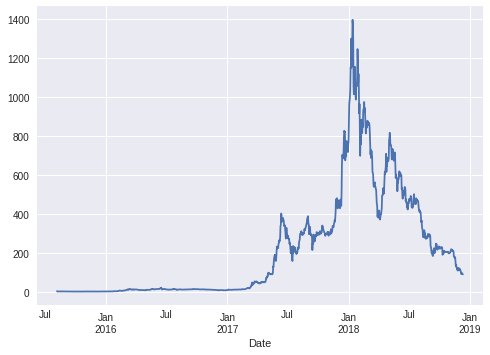

In [10]:
dfE.Close.plot.line()

#### DOWNLOADING FILES TO LOCAL MACHINE

In [0]:
# Downloading clean Bitcoin Data file

from google.colab import files

dfB.to_csv('bitcoin.csv')
files.download('bitcoin.csv')

In [0]:
# Downloading clean Ripple Data file

dfR.to_csv('ripple.csv')
files.download('ripple.csv')

In [0]:
# Downloading clean Ethereum Data File

dfE.to_csv('ethereum.csv')
files.download('ethereum.csv')